## Enhancement to concentration

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../src')
import dce_fit, relaxivity, signal_models, aifs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Set parameters

In [8]:
r1, r2 = 5.0, 0
tr, fa, te  = 3.4e-3, 15, 1.7e-3
t10 = 2
k_fa = 1.0
c_to_r_model = relaxivity.CRLinear(r1, r2)
signal_model = signal_models.SPGR(tr, fa, te)

Plot enh vs. concentration:

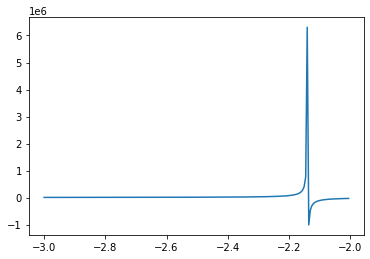

In [37]:
conc_range = np.arange(-3, -2, 0.005)
enh = dce_fit.conc_to_enh(conc_range, t10, k_fa, c_to_r_model, signal_model)
plt.plot(conc_range, enh)

First use the general method to convert enhancement to concentration.
This uses a numerical method to estimate concentration.
Accounts for pulse sequence and T2* dephasing.

In [ ]:
c_to_r_model = relaxivity.CRLinear(r1, r2)
signal_model = signal_models.SPGR(tr, fa, te)
e_to_c_general = dce_fit.EnhToConc(c_to_r_model, signal_model)

Now use the analytical method.
This assumes the SPGR pulse sequence.
It does not account for T2* dephasing.

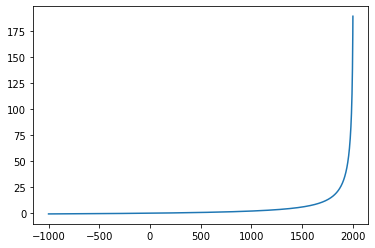

In [51]:
e_to_c_ana = dce_fit.EnhToConcSPGR(tr, fa, r1)
e_range = np.arange(-1000,2000,1.1)
C_t_ana = e_to_c_ana.proc(e_range, t10, k_fa=k_fa)
plt.plot(e_range, C_t_ana);


In [ ]:

enh = np.arange(3000)

c_to_r_model = relaxivity.CRLinear(r1, r2)
signal_model = signal_models.SPGR(tr, fa, te)
e_to_c_num = dce_fit.EnhToConc(c_to_r_model, signal_model)
C_t_num = e_to_c_num.proc(enh, t10, k_fa)

e_to_c_ana = dce_fit.EnhToConcSPGR(tr, fa, r1)
C_t_ana = e_to_c_ana.proc(enh, t10, k_fa)

plt.plot(enh, C_t_num, 'k-',
         enh, C_t_ana, 'r-')